<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-6_mi/blob/main/notebooks/mechanistic_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

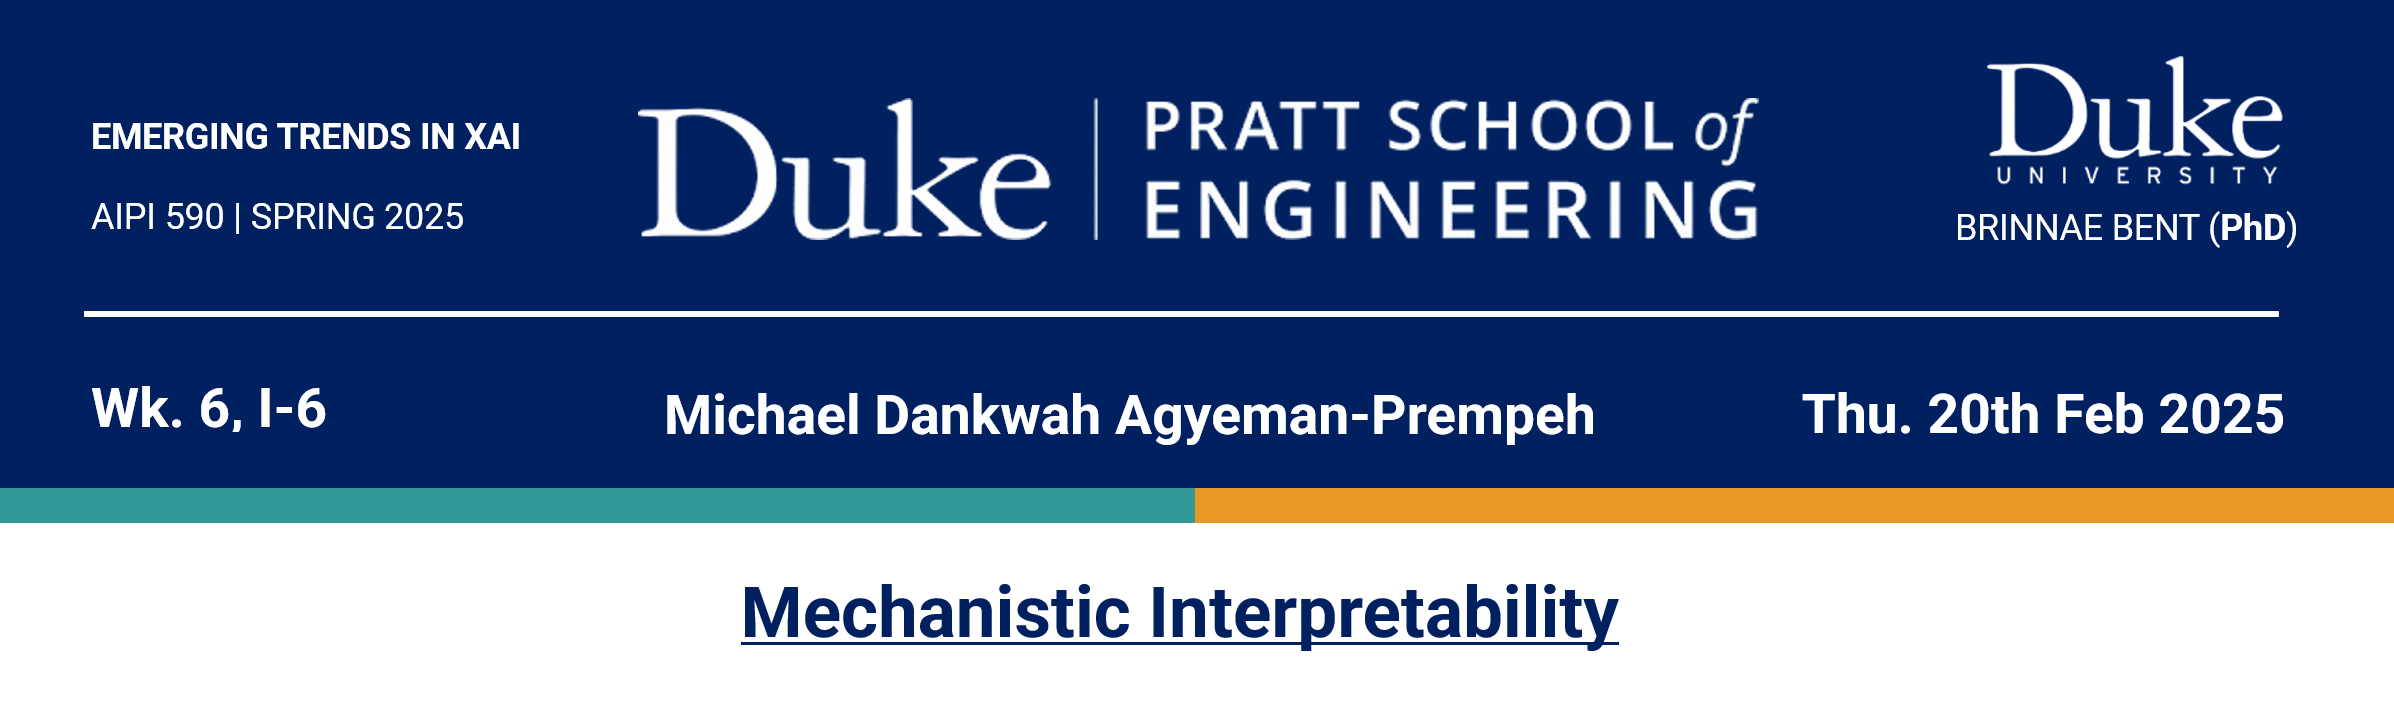

### 🔃 **Downloading Files Externally [the requirements.txt file] for Processing as well as Package Installation (With the Idea of Sharing to Others)**

In [ ]:
!pip install -U gdown  # Installing gdown if not already installed

# A - Grabbing actual file IDs from the Google Drive shared links
reqtxt_file_id = "1wt0xrl310ymGJ1HzZxe_PIjr6DfEiQ6s"

# B - Saving file to local varible for ease of use
reqtxt_output_file = "requirements.txt"

# C - Download the requirements file
!gdown "https://drive.google.com/uc?id={reqtxt_file_id}" -O {reqtxt_output_file}


                      # ---- SUPPORT TAGGING ---- #
#----> via me on 6 Feb 25 @ 1:00am (referenced from old data science notebook)
#----> via Gemini AI on 5 Feb 25 @ 9:19pm but refined by me (introduced 'if clause')
#----> via DUKE-AI-XAI (AIPI590) global_explanations.ipynb file on 6 Feb 25 @ 1:25am
# <mark>GeminiAI refined my output</mark>

                      # ---- COMMITTING TO GITHUB ---- #
# Progressing with I-5, 30% done

Downloading...
From: https://drive.google.com/uc?id=1oXjGGCRqFioBEuaZ_9qtV74HfLIe81G1
To: /content/requirements.txt
100% 114/114 [00:00<00:00, 478kB/s]
Downloading...
From: https://drive.google.com/uc?id=1BteZbCAiL5iyPKqpUWv9pJSf5xoVvysi
To: /content/zebra_img_1
100% 101k/101k [00:00<00:00, 92.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HNbAN0krlLJxn290er-fe7NJmHL6aaII
To: /content/zebra_img_2
100% 34.1k/34.1k [00:00<00:00, 54.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eFsC3o1Fy2RrR45ncS4i77kcBXGNFfLA
To: /content/zebra_img_3
100% 128k/128k [00:00<00:00, 93.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=18qfJdYz4K9iBJTfIl5w0ea782EC2vARR
To: /content/zebra_img_4
100% 72.6k/72.6k [00:00<00:00, 94.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y0Y8HMKWsHSjRK8lQ0CMIgoe-KUxn3OO
To: /content/zebra_img_5
100% 61.7k/61.7k [00:00<00:00, 58.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T8jMYSOxiNfRYMcOAY7kArhtcu5pwxJY
To: /c

>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-5_edl/blob/main/notebooks/explainable_deep_learn.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

# **The Journey to Understanding Mechanistic Interpretability**
*Prepared by Michael Dankwah Agyeman-Prempeh - Thu 20th February, 2025*

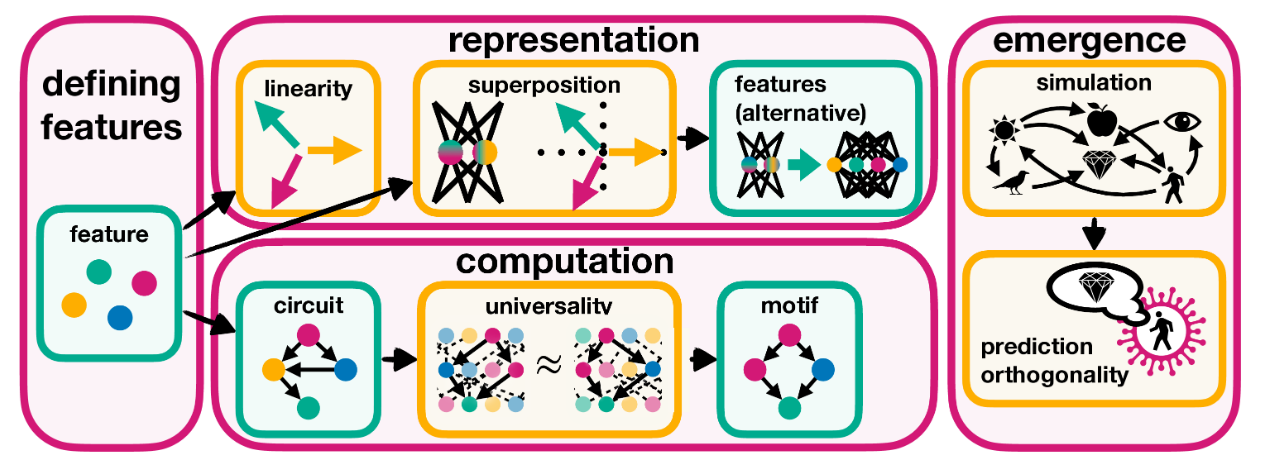

*Image from [https://leonardbereska.github.io/blog/2024/mechinterpreview/](https://leonardbereska.github.io/blog/2024/mechinterpreview/)*

##🥅 **Project Goal:**
### *The goal of this assignment is to implement and explore a key finding from a mechanistic interpretability paper. I will select a technique, summarize its significance, and develop a coded implementation with documentation and visualizations. The project would demonstrate my understanding by applying the method to a simple example, comparing results to the original paper, and reflecting on challenges and potential improvements.*


--------------------------------------------------------------------------------

## 🛣️ Implementation Guide for Activation Patching on IOI Task
### This notebook includes:

1. Residual Stream Patching Hook: The function that patches the residual stream at specific layers and positions.
2. Iteration over Layers and Positions: Loops through each layer and position to apply the patch and calculate the normalized logit difference.
3. Visualization: Code for visualizing the normalized logit differences as a heatmap.
4. Setup for Induction Scores and Attention Patterns: Although not directly for IOI, these snippets are useful for visualizing attention heads, which can be insightful for interpretability.

<mark> Steps refined and given to me by ChatGPT </mark> after providing it my inout text of what I wanted to achieve based on [Neel Nanda's jupyter notebook on Mechanistic probability](https://colab.research.google.com/github/neelnanda-io/TransformerLens/blob/main/demos/Main_Demo.ipynb)

---

In [ ]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# NB: You can choose to un-comment and clone if not, the code book should run fine from 'gdown' approach
# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-5_edl}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-5_edl.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-5_edl} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-5_edl)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Setup & Imports or Libraries & Packages Installation**

# **Neel's Setup**

In [ ]:
# import os
# DEVELOPMENT_MODE = False
# # Detect if we're running in Google Colab
# try:
#     import google.colab
#     IN_COLAB = True
#     print("Running as a Colab notebook")
# except:
#     IN_COLAB = False

# # Install if in Colab
# if IN_COLAB:
#     %pip install transformer_lens
#     %pip install circuitsvis
#     # Install a faster Node version
#     !curl -fsSL https://deb.nodesource.com/setup_16.x | sudo -E bash -; sudo apt-get install -y nodejs  # noqa

# # Hot reload in development mode & not running on the CD
# if not IN_COLAB:
#     from IPython import get_ipython
#     ip = get_ipython()
#     if not ip.extension_manager.loaded:
#         ip.extension_manager.load('autoreload')
#         %autoreload 2

# IN_GITHUB = os.getenv("GITHUB_ACTIONS") == "true"


In [ ]:
# # Plotly needs a different renderer for VSCode/Notebooks vs Colab argh
# import plotly.io as pio
# if IN_COLAB or not DEVELOPMENT_MODE:
#     pio.renderers.default = "colab"
# else:
#     pio.renderers.default = "notebook_connected"
# print(f"Using renderer: {pio.renderers.default}")

Using renderer: colab


In [ ]:
# import circuitsvis as cv
# # Testing that the library works
# cv.examples.hello("Michael Dankwah Agyeman-Prempeh")

In [ ]:
# # Import stuff
# import torch
# import torch.nn as nn
# import einops
# from fancy_einsum import einsum
# import tqdm.auto as tqdm
# import plotly.express as px

# from jaxtyping import Float
# from functools import partial

In [ ]:
# # import transformer_lens
# import transformer_lens.utils as utils
# from transformer_lens.hook_points import (
#     HookPoint,
# )  # Hooking utilities
# from transformer_lens import HookedTransformer, FactoredMatrix

We turn automatic differentiation off, to save GPU memory, as this notebook focuses on model inference not model training.

In [ ]:
# torch.set_grad_enabled(False)

Plotting helper functions:

In [ ]:
# def imshow(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
#     px.imshow(utils.to_numpy(tensor), color_continuous_midpoint=0.0, color_continuous_scale="RdBu", labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

# def line(tensor, renderer=None, xaxis="", yaxis="", **kwargs):
#     px.line(utils.to_numpy(tensor), labels={"x":xaxis, "y":yaxis}, **kwargs).show(renderer)

# def scatter(x, y, xaxis="", yaxis="", caxis="", renderer=None, **kwargs):
#     x = utils.to_numpy(x)
#     y = utils.to_numpy(y)
#     px.scatter(y=y, x=x, labels={"x":xaxis, "y":yaxis, "color":caxis}, **kwargs).show(renderer)

# **Michael's Setup**

Before we proceed, we need to ensure the required libraries are imported, including `transformer_lens`, `torch`, and `einops`.

In [ ]:
#Install the requirements for this package and included in requirements.txt file for the purposes of working on Colab independently
!pip install -r requirements.txt

In [ ]:
# General packages for EDA, Plotting etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Packages for this assignment
# Required Imports                                            #----> via ChatGPT on 19 Feb 25 @ 9:19pm
import torch
import einops
from functools import partial

import tqdm.auto as tqdm
from transformer_lens import HookedTransformer, utils
from transformer_lens.hook_points import HookPoint

## ⚙️ **II. Loading Model and Setting Up Colab Environment for Successful Task Execution**

Loading the `GPT-2 model` and set up the device (GPU is recommended).

In [ ]:
# Setting Device and Loading Model                                        #----> via ChatGPT on 19 Feb 25 @ 9:23pm
import torch
device = utils.get_device()
model = HookedTransformer.from_pretrained("gpt2-small", device=device)
torch.set_grad_enabled(False)

## ⛓️ **III. Setting Up the Indirect Object Identification (IOI) Task**

In [ ]:
# IOI Task Prompts                                                                    #----> via ChatGPT on 19 Feb 25 @ 9:26pm
clean_prompt = "After John and Mary went to the store, Mary gave a bottle of milk to"
corrupted_prompt = "After John and Mary went to the store, John gave a bottle of milk to"

clean_tokens = model.to_tokens(clean_prompt)
corrupted_tokens = model.to_tokens(corrupted_prompt)

> ### ✖️➕➖➗🟰 **Logit Difference Calculation**

In [ ]:
# Function to calculate logit difference                                            #----> via ChatGPT on 19 Feb 25 @ 9:34pm
def logits_to_logit_diff(logits, correct_answer=" John", incorrect_answer=" Mary"):
    correct_index = model.to_single_token(correct_answer)
    incorrect_index = model.to_single_token(incorrect_answer)
    return logits[0, -1, correct_index] - logits[0, -1, incorrect_index]

# Get logits and cache from clean and corrupted prompts
clean_logits, clean_cache = model.run_with_cache(clean_tokens)
clean_logit_diff = logits_to_logit_diff(clean_logits)

corrupted_logits = model(corrupted_tokens)
corrupted_logit_diff = logits_to_logit_diff(corrupted_logits)

print(f"Clean logit difference: {clean_logit_diff.item():.3f}")
print(f"Corrupted logit difference: {corrupted_logit_diff.item():.3f}")

## 🪝 **IV. Residual Stream Patching Hook**

This function patches the residual stream activations at specific layers and positions using hooks.

In [ ]:
# Residual Stream Patching Hook                             #----> via ChatGPT on 19 Feb 25 @ 9:45pm
def residual_stream_patching_hook(
    resid_pre: torch.Tensor,
    hook: HookPoint,
    position: int
) -> torch.Tensor:
    clean_resid_pre = clean_cache[hook.name]
    resid_pre[:, position, :] = clean_resid_pre[:, position, :]
    return resid_pre

## 🎬 **V. Applying Activation Patching**

Here, we will iterate over all layers and positions to apply the patching hook and calculate the normalized logit difference.

In [ ]:
# Storing results on model's device                                                 #----> via ChatGPT on 19 Feb 25 @ 10:16pm
num_positions = len(clean_tokens[0])
ioi_patching_result = torch.zeros((model.cfg.n_layers, num_positions), device=model.cfg.device)

# Iterating over all layers and positions
for layer in tqdm.tqdm(range(model.cfg.n_layers)):
    for position in range(num_positions):
        # Fix position using partial
        temp_hook_fn = partial(residual_stream_patching_hook, position=position)
        # Apply patching hook
        patched_logits = model.run_with_hooks(corrupted_tokens, fwd_hooks=[
            (utils.get_act_name("resid_pre", layer), temp_hook_fn)
        ])
        # Calculate logit difference
        patched_logit_diff = logits_to_logit_diff(patched_logits).detach()
        # Store normalized result
        ioi_patching_result[layer, position] = (patched_logit_diff - corrupted_logit_diff) / (clean_logit_diff - corrupted_logit_diff)

## 📊 **VI. Visualization**

Using `plotly.express`, we will visualize the normalized logit differences as a heatmap.

In [ ]:
# Visualization Setup                                                                                     #----> via ChatGPT on 19 Feb 25 @ 10:22pm
token_labels = [f"{token}_{index}" for index, token in enumerate(model.to_str_tokens(clean_tokens))]
px.imshow(
    ioi_patching_result.cpu().numpy(),
    labels={"x": "Position", "y": "Layer"},
    x=token_labels,
    y=list(range(model.cfg.n_layers)),
    color_continuous_scale="Viridis",
    title="Normalized Logit Difference After Patching Residual Stream on the IOI Task"
).show()

--------------------------------------------------------------------------------

## 📊 **Interpretation:**
## *Connecting the Maps to the Hypotheses*

### **🎨 Visual Analysis of Saliency Maps of Viz#1 and Viz#2:**
- Original Images: From the real zebra images #3 and #5, we clearly see a zebra's full body in motion and a zebra's nose to neck region in the original image. The stripes are a prominent visual feature and hence would help with determining what featire contributes more to the classification of the zebra.

- Saliency Maps: The saliency maps, both overlayed with and without original image and displayed as a heatmap, shows areas of varying intensity. Brighter (redder) areas, as discussed, indicate regions that had a stronger influence on the model's "zebra" classification.

### **🦓 Stripes Highlighted?**
Looking at the saliency maps, we observe that the brighter regions do indeed appear to correspond, at least partially, to the striped areas of the zebra though not clear.

### **🆘 Support for $H_1$?**
The visual evidence suggests that the saliency map does highlight the striped regions to some extent. This observation lends some support to my alternative hypothesis ($H_1$) meaning I would have reject $H_0$ (null hypothesis) and accept $H_1$. It indicates that the model is likely attending to or focusing on the striped features when making its classification.

---

## 🔚 **Conclusion:**

## *Summary of Key Findings:*

> ### **1. Classification Feature**
- From my analyis, I realised that the feature you expect to contribute more in clasifying an animal would sometimes not be those ones.

> ### **2. Effectiveness of Saliency Maps on Zebra Image**
- To really verify and buttress my first visualization if the saliency map was doing a good job focusing on the right places to really predict the zebra image, I run some code to developing bounding boxes, make use of a manually annotated zebra to get the IoU (Intersection over Union) score and then make another conclusion.


From the above results (Viz #2), the IoU scores for all 5 images were low (i.e., < 0.3), indicating a poor or no significant overlap. The major key finding for me was maybe, the saliency map is likely focusing on the wrong areas and hence the approach to use `saliency maps` for testing this hypotheses does a partial job.

My quest to use `saliency maps` was to justify that it could do a good job as `TVAC` could. Hopefully in my next report, I will leverage TVAC and some testing to verify my hypothese.

In conclusion, it will be very hard to reject the null hypothesis ($H_0$) as our second step to verify the initial rejection, crossed out.

---

## 🧠 **References:**

- [ChatGPT](https://chatgpt.com/)
- [GeminiAI](https://gemini.google.com/app)


---

## <mark>*End Of Report*</mark>